## Gamdom.com roulette data analysis

We are trying to get some data insights to predict the color or result from roulette matches at
Gamdom.com

Feel free to contribute.

Analysis made by vitorys

Data crawled by guerraUTFPR

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('output.csv')
df.columns

Index([u'match_number', u'date', u'hour', u'value', u'total_bet_red',
       u'total_bet_green', u'total_bet_black', u'total_bet'],
      dtype='object')

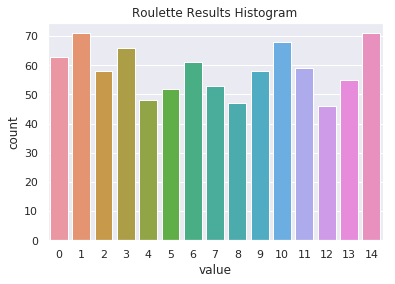

In [3]:
sns.set(style="darkgrid")
ax = sns.countplot(df['value'])
plt.title('Roulette Results Histogram')
plt.show()

### Uniform probability distribution. Seems that all numbers has the same % of appear

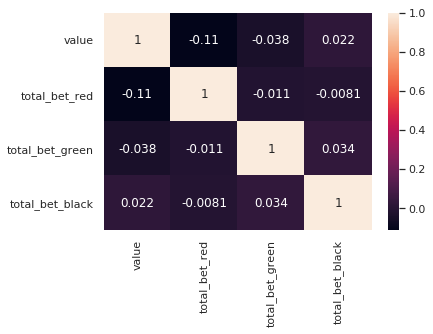

In [4]:
corr = df[['value', 'total_bet_red', 'total_bet_green', 'total_bet_black']].corr()
ax = sns.heatmap(corr, annot=True)

### There is not a correlation between bets and the value from roulette

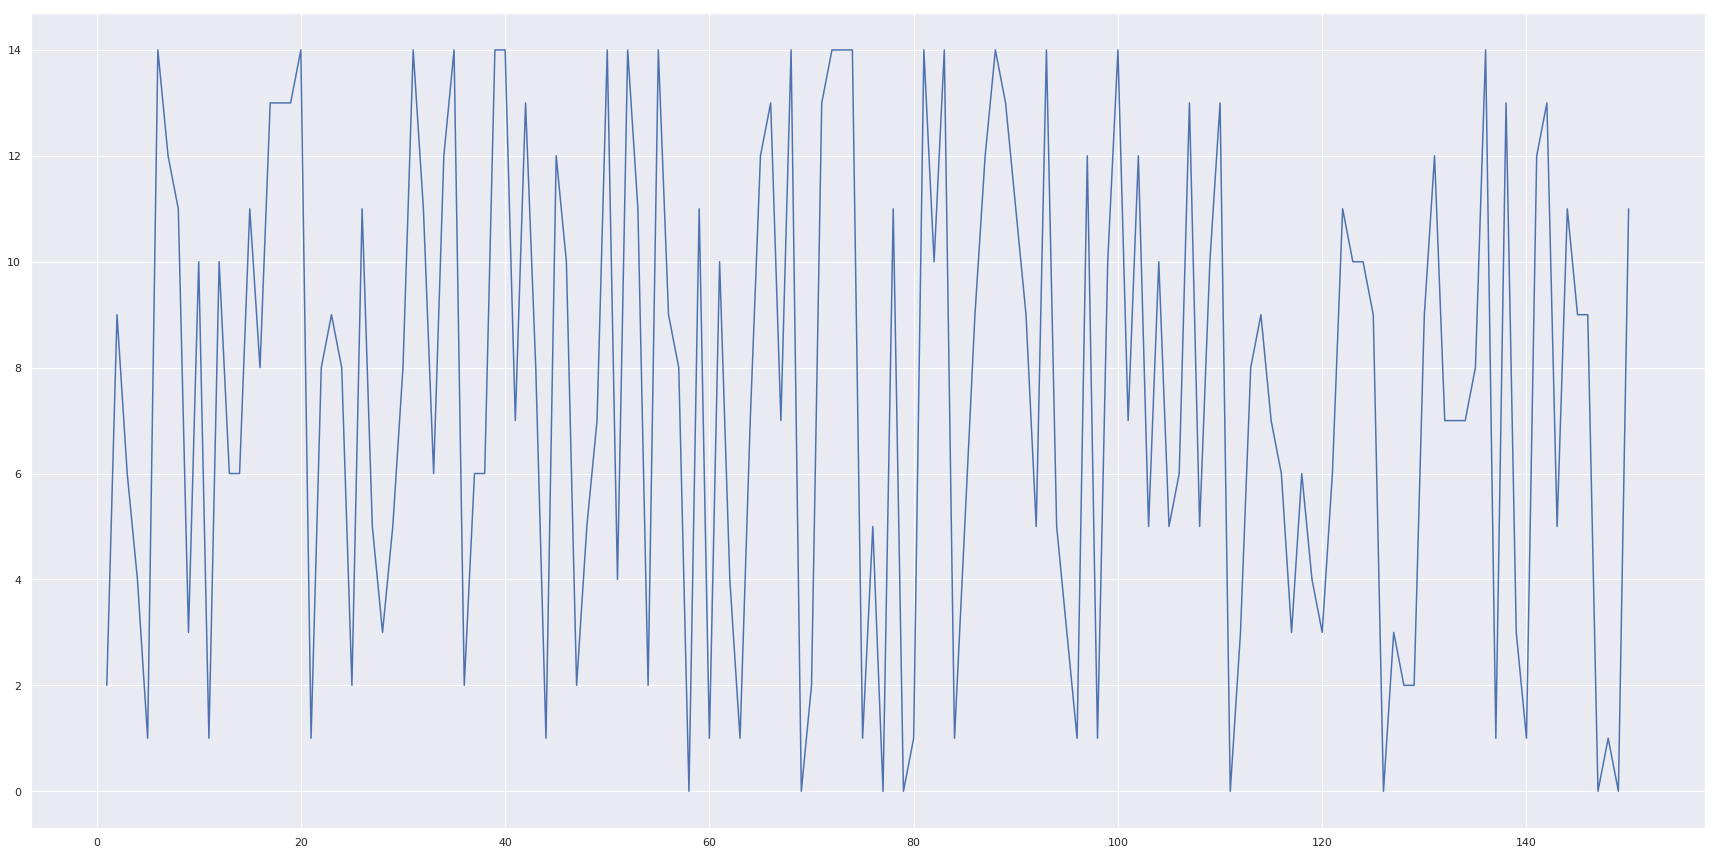

In [5]:
_df = df[['match_number','hour','value', 'total_bet_red', 'total_bet_green', 'total_bet_black']]
plt.figure(figsize=(30,15))
plt.plot(_df.values[:150,0],_df.values[:150,2])
plt.show()

### Rarely roulette value are the same for 2 rounds.
### eg: Number 3 at the match 1 and number 3 at the match 2

In [6]:
df_categorical = pd.read_csv('output.csv')
df_categorical['value'] = df_categorical['value'].apply(lambda x: 'R' if int(x) > 0 and int(x) <=7 else ('B' if int(x) > 7 and int(x) <= 14 else 'G'))

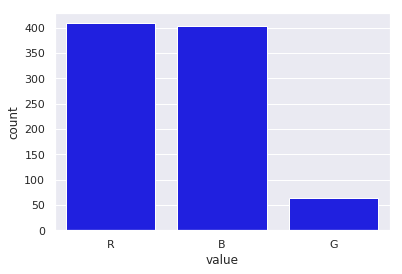

In [7]:
sns.set(style="darkgrid")
ax = sns.countplot(df_categorical['value'], color="blue")

### Red and Black have the same probability to appear.

In [8]:
number_matches_without_green_history = []
matches_without_g = 0
for element in df_categorical['value']:
    if element != 'G':
        matches_without_g += 1
    else:
        number_matches_without_green_history.append(matches_without_g)
        matches_without_g = 0

In [9]:
print("Mean of matches untill green: {}".format(np.mean(number_matches_without_green_history)))
print("Standard Deviation: {}".format(np.std(number_matches_without_green_history)))

Mean of matches untill green: 12.619047619
Standard Deviation: 14.2231965369


### 12.6 matches untill green appears with 14 standard deviation
### Not a good strategy to bet on green.

In [10]:
data = df['value'].values
def generate_x_y(data):
    x = []
    y = []
    
    for i in range(14, len(data)):
        x.append(data[i-14:i-1])
        y.append(data[i])
    
    return x,y
x,y = generate_x_y(data)


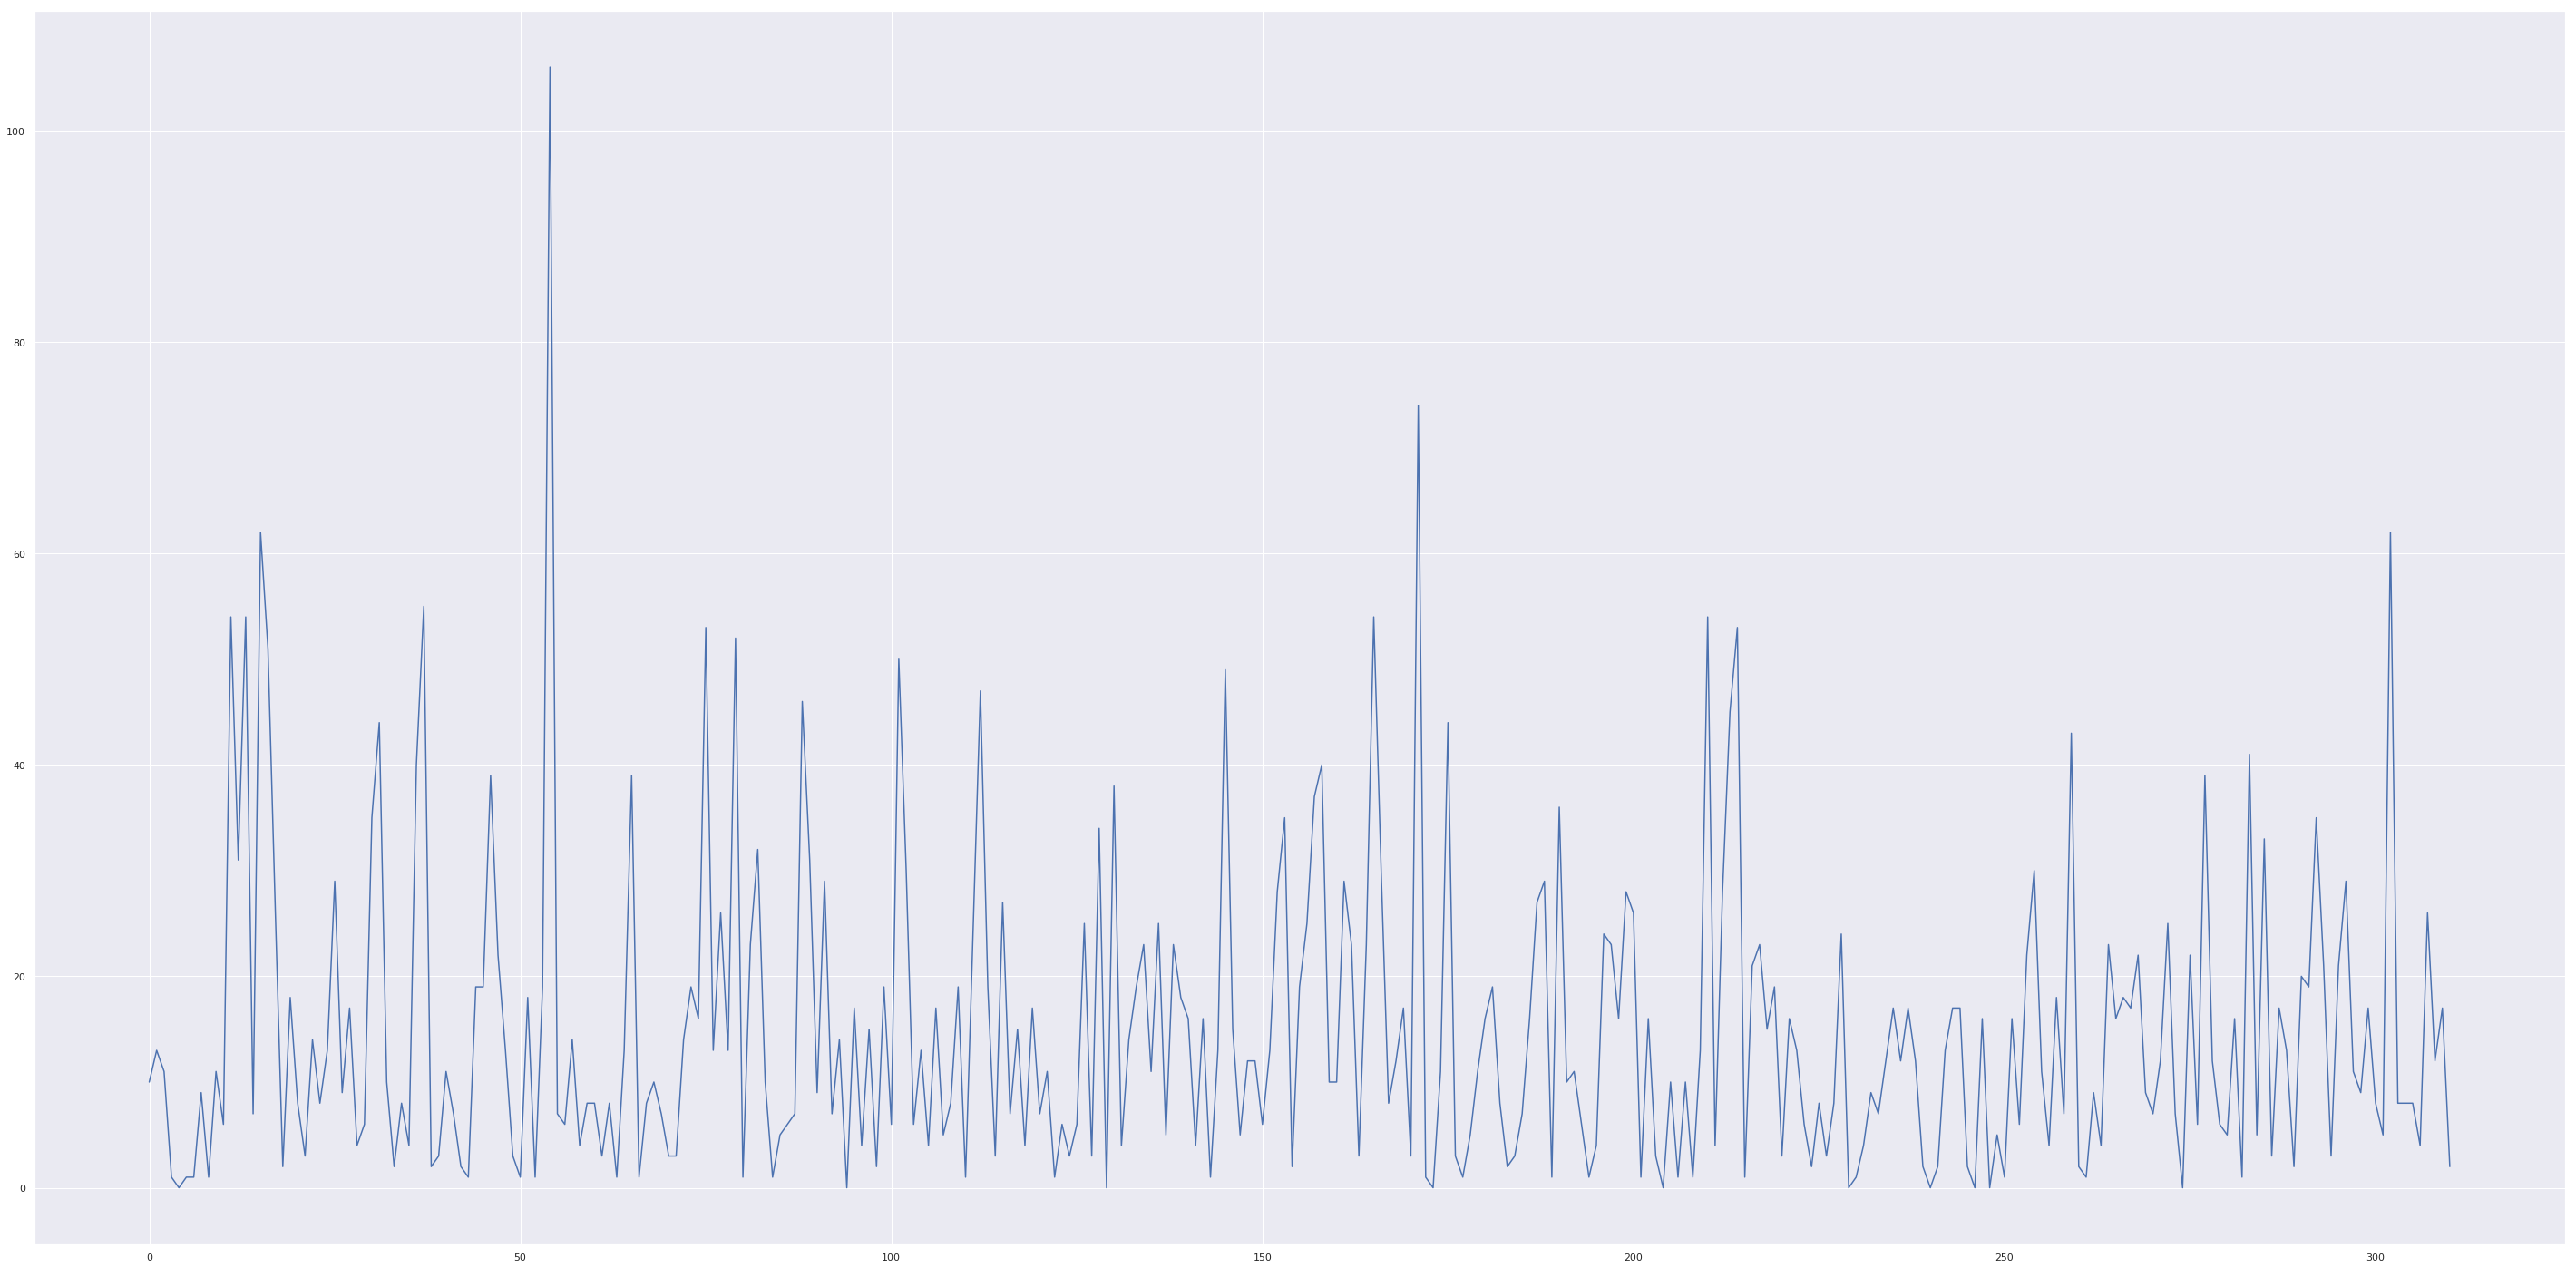

In [24]:
a = [2, 17, 12, 26, 4, 8, 8, 8, 62, 5, 8, 17, 9, 11, 29, 21, 3, 21, 35, 19, 20, 2, 13, 17, 3, 33, 5, 41, 1, 16, 5, 6, 12, 39, 6, 22, 0, 7, 25, 12, 7, 9, 22, 17, 18, 16, 23, 4, 9, 1, 2, 43, 7, 18, 4, 11, 30, 22, 6, 16, 1, 5, 0, 16, 0, 2, 17, 17, 13, 2, 0, 2, 12, 17, 12, 17, 12, 7, 9, 4, 1, 0, 24, 8, 3, 8, 2, 6, 13, 16, 3, 19, 15, 23, 21, 1, 53, 45, 28, 4, 54, 13, 1, 10, 1, 10, 0, 3, 16, 1, 26, 28, 16, 23, 24, 4, 1, 6, 11, 10, 36, 1, 29, 27, 16, 7, 3, 2, 8, 19, 16, 11, 5, 1, 3, 44, 11, 0, 1, 74, 3, 17, 12, 8, 30, 54, 23, 3, 23, 29, 10, 10, 40, 37, 25, 19, 2, 35, 28, 13, 6, 12, 12, 5, 15, 49, 13, 1, 16, 4, 16, 18, 23, 5, 25, 11, 23, 19, 14, 4, 38, 0, 34, 3, 25, 6, 3, 6, 1, 11, 7, 17, 4, 15, 7, 27, 3, 19, 47, 24, 1, 19, 8, 5, 17, 4, 13, 6, 30, 50, 6, 19, 2, 15, 4, 17, 0, 14, 7, 29, 9, 31, 46, 7, 6, 5, 1, 10, 32, 23, 1, 52, 13, 26, 13, 53, 16, 19, 14, 3, 3, 7, 10, 8, 1, 39, 13, 1, 8, 3, 8, 8, 4, 14, 6, 7, 106, 19, 1, 18, 1, 3, 13, 22, 39, 19, 19, 1, 2, 7, 11, 3, 2, 55, 40, 4, 8, 2, 10, 44, 35, 6, 4, 17, 9, 29, 13, 8, 14, 3, 8, 18, 2, 26, 51, 62, 7, 54, 31, 54, 6, 11, 1, 9, 1, 1, 0, 1, 11, 13, 10]
plt.figure(figsize=(50,25))
plt.plot(range(len(a)), np.flip(a))
